## Proyecto TMFAirbnb

### Features 

In [4]:
initial_features = ['id', 'scrape_id', 'last_scraped', 'name', 'summary', 'space',
       'description', 'experiences_offered', 'neighborhood_overview',
       'transit', 'access', 'interaction', 'house_rules', 'host_id',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_is_superhost',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'calendar_last_scraped', 'number_of_reviews',
       'number_of_reviews_ltm', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'requires_license', 'license',
       'instant_bookable', 'is_business_travel_ready', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month']

### Features cleaned

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use('ggplot')
df = pd.read_csv("../DadesAirBNB/cleandataset.csv")
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [2]:
df.columns

Index(['access', 'accommodates', 'availability_365', 'bathrooms', 'bed_type',
       'bedrooms', 'beds', 'calculated_host_listings_count',
       'cancellation_policy', 'cleaning_fee', 'description', 'extra_people',
       'guests_included', 'host_has_profile_pic', 'host_identity_verified',
       'host_is_superhost', 'host_response_time', 'host_since',
       'host_total_listings_count', 'house_rules', 'instant_bookable',
       'interaction', 'is_business_travel_ready', 'is_location_exact',
       'latitude', 'longitude', 'maximum_nights', 'minimum_nights', 'name',
       'neighborhood_overview', 'neighbourhood_group_cleansed',
       'number_of_reviews', 'price', 'property_type',
       'require_guest_phone_verification', 'require_guest_profile_picture',
       'requires_license', 'review_scores_accuracy', 'review_scores_checkin',
       'review_scores_cleanliness', 'review_scores_communication',
       'review_scores_location', 'review_scores_rating', 'review_scores_value',
       

In [5]:
len(initial_features), len(df.columns)

(92, 68)

In [6]:
strCol = df.columns[df.dtypes == "object"]
noStrCol = df.columns[df.dtypes != "object"]

**Variable dependiente**

In [7]:
df['month'] = df['month'].apply(lambda x: '0'+str(x) if len(str(x)) < 2 else x)
df['date'] = df['year'].astype('str') + '-' + df['month'].astype('str')
df['date'] = pd.to_datetime(df['date'])

In [8]:
df.groupby('date')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
date,,,,,,,,
2018-04-01,15391.0,93.143201,143.646058,8.0,35.0,60.0,105.0,9120.0
2018-05-01,15217.0,93.948019,141.286224,8.0,35.0,60.0,108.0,9120.0
2018-06-01,13870.0,93.744052,146.733234,0.0,35.0,58.0,105.0,9120.0
2018-07-01,14461.0,93.483922,141.546008,0.0,35.0,59.0,107.0,9120.0
2018-08-01,14918.0,86.738906,130.850497,8.0,35.0,55.0,100.0,9120.0
2018-09-01,15072.0,90.768777,136.082341,8.0,35.0,57.0,100.0,9120.0
2018-10-01,14681.0,103.250528,235.386307,8.0,35.0,56.0,100.0,20000.0
2018-11-01,14442.0,91.006924,152.825829,8.0,35.0,55.0,100.0,9120.0
2018-12-01,14600.0,90.560753,158.524641,8.0,35.0,55.0,100.0,9120.0


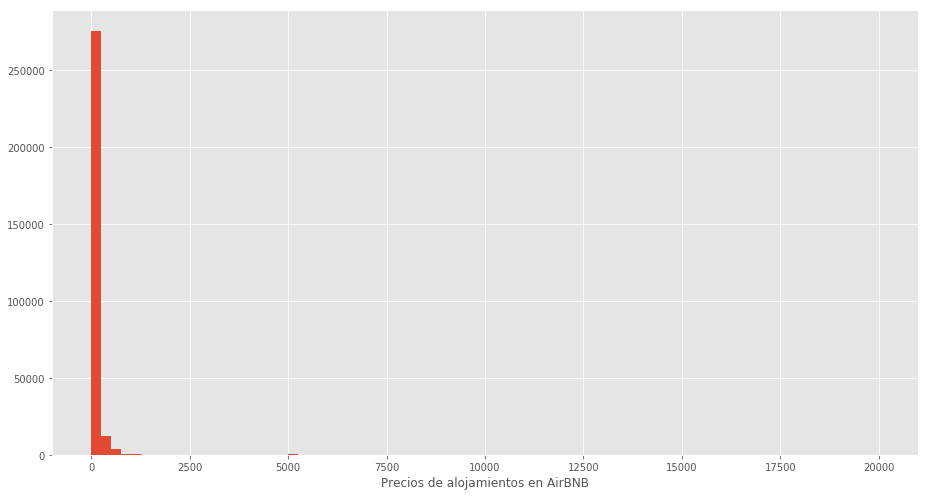

In [9]:
fig, ax = plt.subplots(1, 1, figsize = (13, 7))
ax.hist(df['price'], bins = 80)
plt.xlabel('Precios de alojamientos en AirBNB')
plt.tight_layout()

In [10]:
df[df['price']>=10000][['name', 'description', 'price', 'date', 'minimum_nights']]

,name,description,price,date,minimum_nights
95996,Standard 2 bedroom + 2 bathroom big terrace,75 m2 apartment; maximum capacity 6 people. 2 ...,20000.0,2018-10-01,1
257740,Eixample - Amazing 2BR apartment,Welcome to this beautiful apartment located in...,10000.0,2019-09-01,1
273372,Eixample - Amazing 2BR apartment,Welcome to this beautiful apartment located in...,10000.0,2019-10-01,1
289123,Eixample - Amazing 2BR apartment,Welcome to this beautiful apartment located in...,10000.0,2019-11-01,1


In [11]:
df[df['price']>=1000][['name', 'description', 'price', 'date', 'minimum_nights']]

,name,description,price,date,minimum_nights
2882,Central luxury apartment with chillout terrace...,Luxury and Elegance at it's best. Luxurious an...,1000.0,2018-04-01,3
3196,Central Luxury Penthouse 6 guests (3 Bedrooms) AG,"Free WiFi, 3 bedrooms each with 2 single beds,...",1000.0,2018-04-01,3
3263,COBI Apartment Very central 4 bed / 2 bath ...,bussines traveler,1000.0,2018-04-01,3
3510,Central luxury apartment with chillout terrace B8,Luxury and Elegance at it's best. Luxurious an...,1000.0,2018-04-01,3
4184,Double room in the centre of Barcelona,"With a charming, central location in the heart...",2500.0,2018-04-01,1
...,...,...,...,...,...
290917,Bed in only Girls Room (of 4 pax) - Barcelona!,Bed in female shared room for only 4 persons i...,8000.0,2019-11-01,1
290944,Great location in BCN - Economic shared room!,Nice shared room (up to 4 persons) in a great ...,8000.0,2019-11-01,1
291729,"Eco Boutique Hostal Grau, Double Standard",Perched right on a boutique- and restaurant-li...,1000.0,2019-11-01,1
292913,"Hotel Barcelona Princess , Doble",Our guest rooms are designed for comfort and f...,1000.0,2019-11-01,1


In [33]:
df['pricePNight'] = df['price']/df['minimum_nights']

In [13]:
df['pricePNight'].describe()

count    293560.000000
mean         55.611610
std         185.609198
min           0.000000
25%          15.000000
50%          30.000000
75%          55.000000
max       20000.000000
Name: pricePNight, dtype: float64

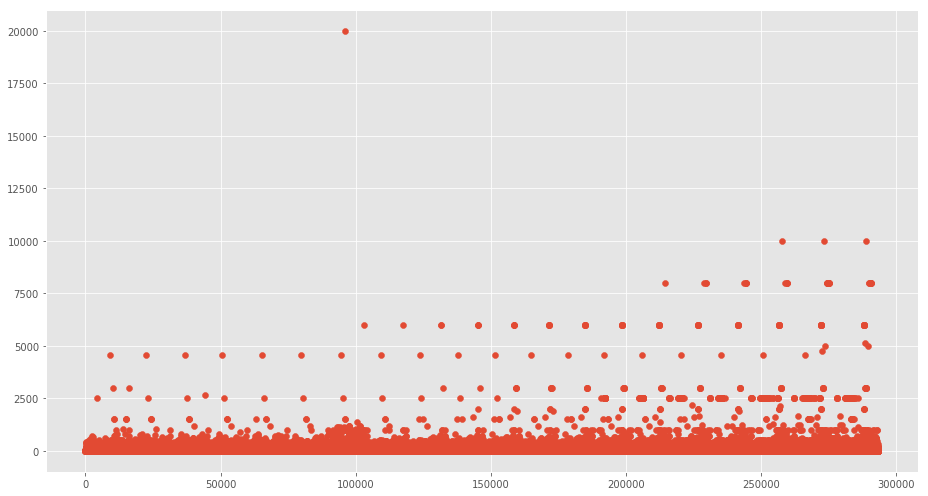

In [14]:
fig, ax = plt.subplots(1, 1, figsize = (13, 7))
ax.scatter(df.index, df['pricePNight'])
plt.tight_layout()

In [15]:
df = df[df['pricePNight']<3000]

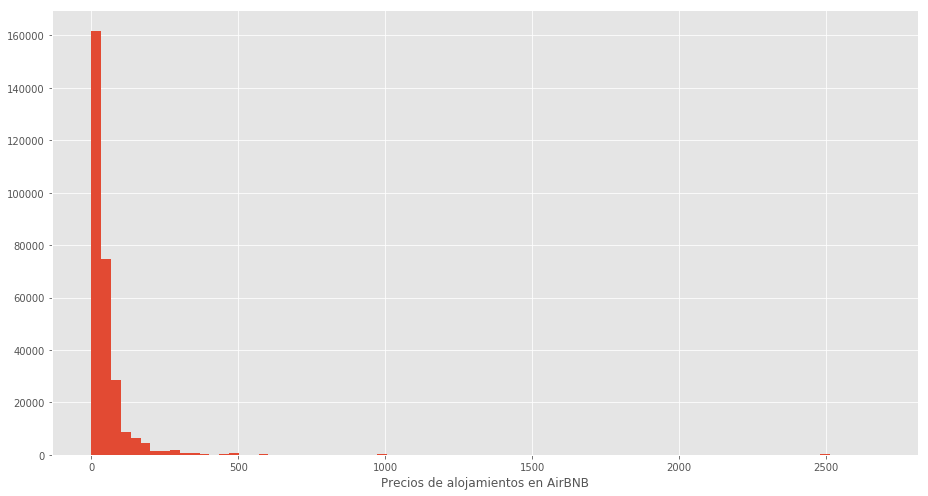

In [16]:
fig, ax = plt.subplots(1, 1, figsize = (13, 7))
ax.hist(df['pricePNight'], bins = 80)
plt.xlabel('Precios de alojamientos en AirBNB')
plt.tight_layout()

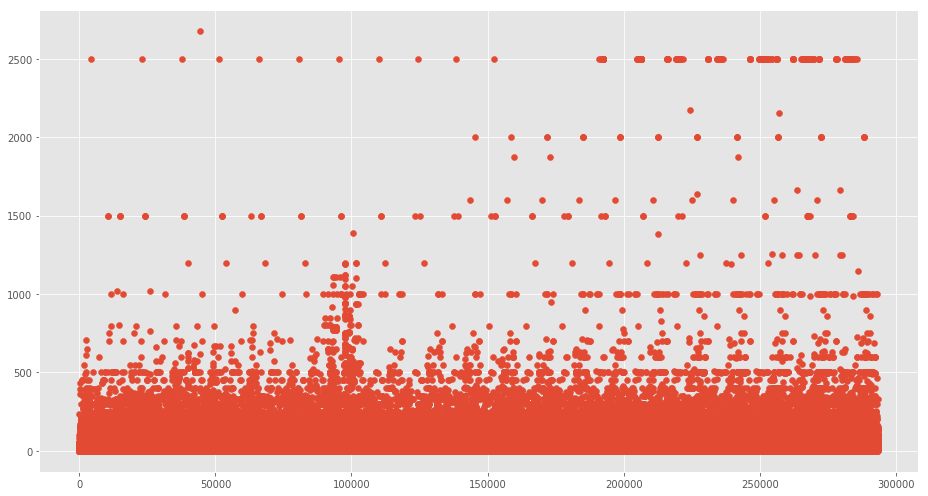

In [17]:
fig, ax = plt.subplots(1, 1, figsize = (13, 7))
ax.scatter(df.index, df['pricePNight'])
plt.tight_layout()

In [18]:
df = df[df['pricePNight']<500]

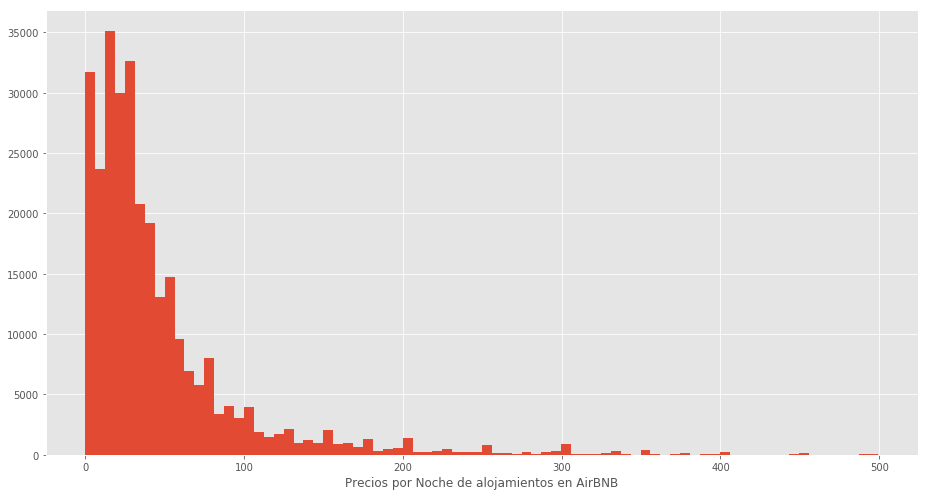

In [19]:
fig, ax = plt.subplots(1, 1, figsize = (13, 7))
ax.hist(df['pricePNight'], bins = 80)
plt.xlabel('Precios por Noche de alojamientos en AirBNB')
plt.tight_layout()

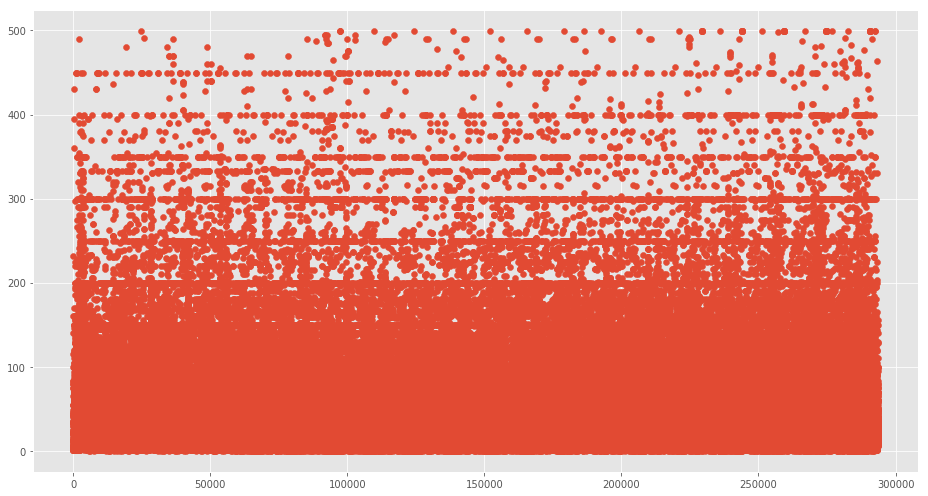

In [20]:
fig, ax = plt.subplots(1, 1, figsize = (13, 7))
ax.scatter(df.index, df['pricePNight'])
plt.tight_layout()

In [34]:
df['pricePNight'].describe()

count    291539.000000
mean         46.036321
std          54.380858
min           0.050000
25%          15.000000
50%          30.000000
75%          55.000000
max         499.500000
Name: pricePNight, dtype: float64

In [22]:
df[df['pricePNight']==0][['name', 'price', 'description']]

,name,price,description
41015,Room for 1 in the center of Barcelona. Sant An...,0.0,The light and cozy room in the flat with 3 bed...
54832,Room for 1 in the center of Barcelona. Sant An...,0.0,The light and cozy room in the flat with 3 bed...


In [23]:
df[(df['pricePNight']<10)&(df['minimum_nights'] > 5)][['name', 'price', 'description', 'minimum_nights']]

,name,price,description,minimum_nights
0,Room for 4 people with bathroom pri,80.0,"Room with private bathroom, TV, wifi, air cond...",31
1,Quiet loft with courtyard,70.0,We are renting this year our apartment in Barc...,30
2,Luxury Duplex en Sant Antoni,45.0,NEW REFORMED LUXURY DUPLEX near metro Sant Ant...,32
3,The green suite,75.0,33 meter squares loft-apartment with beautiful...,31
4,Beautiful Room In The Heart Of BCN ( Las Rambl...,97.0,This beautiful newly furnished room is located...,30
...,...,...,...,...
293198,Habitación/ en el centro de Barcelona,26.0,Piso en el centro de la ciudad cerca de la pla...,30
293215,Room Barcelona,35.0,"Zona bien comunicada, a 5 minutos de la estaci...",30
293258,"Entire Condominium for 5 guests, Center Barcelona",169.0,Entire Condominium of 2 Bedrooms with private ...,60
293268,Bright room with a Balcony in the city centre!,35.0,"The bright exterior room has a wardrobe, bed (...",6


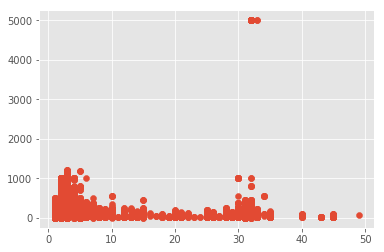

In [24]:
fig, ax = plt.subplots(1, 1)
ax.scatter(df[df['minimum_nights']<50]['minimum_nights'], df[df['minimum_nights']<50]['price'])
plt.show()

In [25]:
df = df[(df['pricePNight']<500)&(df['pricePNight']>0)]

In [27]:
df['price'].quantile(0.95)

250.0

In [31]:
df[df['pricePNight']<10][['price', 'minimum_nights', 'pricePNight']]

,price,minimum_nights,pricePNight
1277,9.0,1,9.000000
1474,9.0,1,9.000000
1480,9.0,1,9.000000
1484,9.0,1,9.000000
2064,9.0,1,9.000000
...,...,...,...
281537,370.0,60,6.166667
282578,9.0,1,9.000000
285881,9.0,1,9.000000
287495,9.0,1,9.000000


In [36]:
pricePNight = []
for x, y in zip(df['price'], df['minimum_nights']):
    if x > 300 and y > 5:
        pricePNight.append(x/y)
    else:
        pricePNight.append(x)
df['pricePNight'] = pricePNight

In [32]:
df['pricePNight'].describe()

count    291539.000000
mean         89.595013
std          97.367334
min           1.447368
25%          35.000000
50%          60.000000
75%         102.000000
max        1200.000000
Name: pricePNight, dtype: float64

In [46]:
df[(df['pricePNight']<10)&(df['minimum_nights']>3)][['name', 'price', 'minimum_nights', 'pricePNight']]

,name,price,minimum_nights,pricePNight
42195,CAPUCCINE FLAT,999.0,120,8.325000
63992,Alojamento en barrio de Gracia..,370.0,60,6.166667
70338,DANCOURT FLAT,999.0,120,8.325000
70898,Listing cancelled,9.0,32,9.000000
78762,Alojamento en barrio de Gracia..,370.0,60,6.166667
84190,Big Brother.,550.0,380,1.447368
85078,DANCOURT FLAT,999.0,120,8.325000
85628,Listing cancelled,9.0,32,9.000000
93627,Alojamento en barrio de Gracia..,370.0,60,6.166667
98570,Loft 4 Private Large Groups,550.0,300,1.833333


In [50]:
Droprow = df[(df['pricePNight']<10)&(df['minimum_nights']>3)].index
df.drop(Droprow, axis = 0, inplace = True)

In [51]:
df['pricePNight'].describe()

count    291501.000000
mean         89.605884
std          97.369020
min           8.000000
25%          35.000000
50%          60.000000
75%         102.000000
max        1200.000000
Name: pricePNight, dtype: float64

In [52]:
df.shape

(291501, 70)

### Pregunta ¿Capamos más los precios? o ¿Añadimos una feature precios de lujo?

**En definitiva, nuestra variable dependiente va a ser** ```PricePNight```

**Variables de tipo str / object**

In [53]:
strCol

Index(['access', 'bed_type', 'cancellation_policy', 'description',
       'host_response_time', 'host_since', 'house_rules', 'interaction',
       'name', 'neighborhood_overview', 'neighbourhood_group_cleansed',
       'property_type', 'room_type', 'space', 'summary', 'transit'],
      dtype='object')

```access```: Columna en la que los host describen las zonas donde el huésped podrá acceder durante su estancia.

```description```: Descripción general del piso o alojamiento.

```host_since```: Año en que el huésped entro en AirBNB.

```house_rules```: Descripción de las reglas del piso.

In [54]:
df[['access', 'description', 'host_since', 'house_rules']].sample(5)

,access,description,host_since,house_rules
241219,NaN,Renovated apartment with terrace with two bedr...,2013-11-03,NaN
120419,"You can use the workshop, attend art exhibitions.",Room + workshop In the artistic heart of B...,2011-06-30,Warmth and respect for the schedules of other ...
169228,"Nosotras vivimos en el apartamento, compartimo...",¡Bienvenidos! Nuestro piso está ubicado en el...,2016-04-27,- hora de silencio: 23hrs a 8am
193857,"you will have access to all areas of the flat,...",This is our family home that we are renting th...,2017-03-29,- all bookings strictly over 32 days to comply...
88249,NaN,"Our flat is located in the heart of Gràcia, be...",2017-09-27,NaN


```interaction```: Columna un poco variopinta, en ella los hosts tratan de describir como reciben a los huéspedes, si respetan la intimidad, etc.

```space```: Descripción de como son las habitaciones y lugares comunes del alojamiento

```neighborhood_overview```: Breve descripción de como es el barrio donde está localizado el alojamiento

In [55]:
df[['interaction', 'transit', 'space']].sample(5)

,interaction,transit,space
147804,"In the time it takes, we are available to addr...",A 5 minute line 2 and 3 subway is the funicula...,Comfortable apartment with 2 small balconies a...
8722,NaN,The flat is in the middle of 2 the metro stati...,The flat is spacious with high ceiling & frenc...
214060,NaN,"Apartment is located right in the centre, all ...","The apartment is shared, it has cute dining ar..."
90372,Ideal para una estancia individual en nuestra ...,NaN,Totalmente renovada y restaurada en 1990 y pos...
142705,We will be more than happy to help you with an...,Ideal to discover the city either on foot or b...,"This apartment has: 1 double bed, 2 single bed..."


```name```: Nombre del 'listing', puede ser clave si utilizamos NLP

```summary```: Resumen que amplía la breve descripción que pueden poner en la columna del nombre.

```transit```: Acceso a medios de transporte desde los alrededores del alojamiento

In [56]:
df[['name', 'summary', 'neighborhood_overview']].sample(5)

,name,summary,neighborhood_overview
73947,Room for rent in BCN/ non smoker,"Habitación exterior para no fumador, piso muy ...",El barrio de Sant Andreu mantiene un ambiente ...
60240,"Bonito, tranquilo y céntrico piso.","Apartamento de diseño, totalmente reformado y ...",NaN
199991,Room for 2 persons in Barceloneta! Center BCN!,"The room for 2 persons, in a great apartment l...",You will be pleasantly surprised by the locati...
261891,CozyRoom&Garden Priv.Bathroom AC,Sunny room in a family house in a unique place...,Poble sec es uno de los barrios de moda en Bar...
250360,H7YOG22 Large apartment in Gracia (3 bedrooms),***WE DO NOT ACCEPT GROUPS OF UNDER 30 YEARS O...,The neighbourhood of Gracia is a stone throw a...


```bed_type```: Como su nombre indica es una column categórica sobre el tipo de cama, impera el tipo "Real Bed".

```cancellation_policy```: Esta columna presentaba varios tipos de cancelación disponibles y los hemos reducido a las siguientes categorias.

```neighbourhood_group_cleansed```: Nombre del barrio donde se situa el alojamiento, entre las tres columnas de barrio elejimos esta porque es la más general y más limpia de todas.

```property_type```: columna que categorizaba el tipo de alojamiento que hemos resumido en unas pocas categorias.

```room_type```

In [57]:
df['host_response_time'].value_counts()

within an hour        182116
within a few hours     41866
undetermined           40337
within a day           23491
a few days or more      3691
Name: host_response_time, dtype: int64

In [58]:
df.groupby('host_response_time')['pricePNight'].mean()

host_response_time
a few days or more    71.367922
undetermined          64.914450
within a day          78.563599
within a few hours    85.092373
within an hour        97.906373
Name: pricePNight, dtype: float64

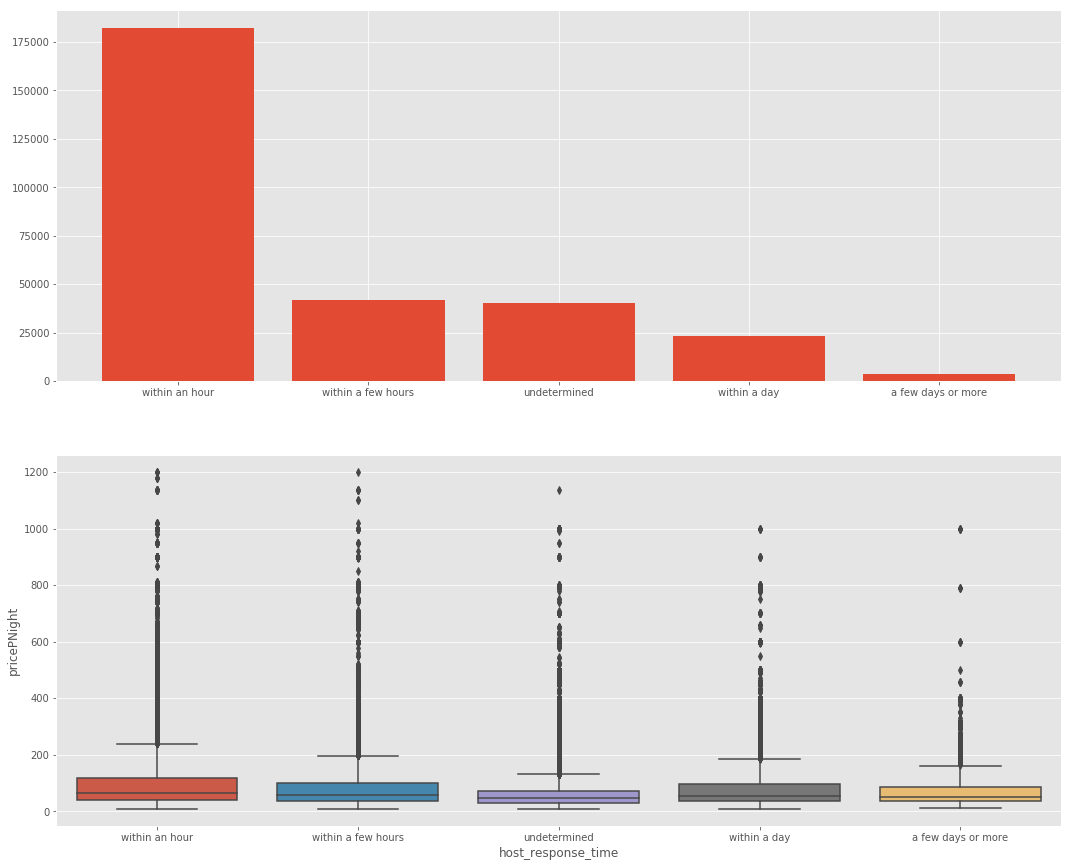

In [59]:
fig, ax = plt.subplots(2, 1, figsize = (18, 15))
ax[0].bar(df['host_response_time'].value_counts().index, df['host_response_time'].value_counts())
sns.boxplot(df['host_response_time'], df['pricePNight'])

In [60]:
df['bed_type'].value_counts()

Real Bed         288818
Pull-out Sofa      1882
Futon               622
Couch               116
Airbed               63
Name: bed_type, dtype: int64

In [61]:
df.groupby('bed_type')['pricePNight'].mean()

bed_type
Airbed           230.523810
Couch            199.991379
Futon             45.072347
Pull-out Sofa     70.572795
Real Bed          89.750742
Name: pricePNight, dtype: float64

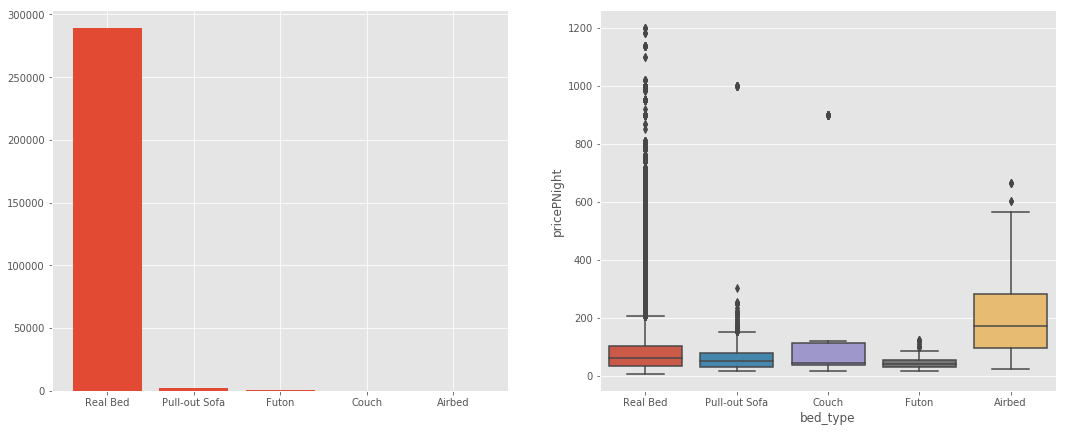

In [62]:
fig, ax = plt.subplots(1, 2, figsize = (18, 7))
ax[0].bar(df['bed_type'].value_counts().index, df['bed_type'].value_counts())
sns.boxplot(df['bed_type'], df['pricePNight'])

In [63]:
df['cancellation_policy'].value_counts()

strict_less30      151458
moderate            81314
flexible            56826
strict_30orMore      1903
Name: cancellation_policy, dtype: int64

In [64]:
df.groupby('cancellation_policy')['pricePNight'].mean()

cancellation_policy
flexible            62.006149
moderate            92.953187
strict_30orMore    156.782974
strict_less30       97.319984
Name: pricePNight, dtype: float64

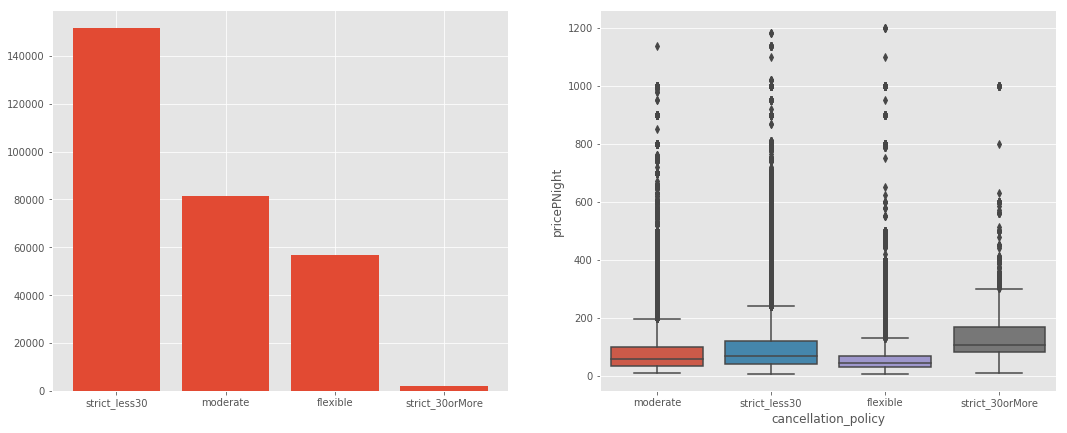

In [65]:
fig, ax = plt.subplots(1, 2, figsize = (18, 7))
ax[0].bar(df['cancellation_policy'].value_counts().index, df['cancellation_policy'].value_counts())
sns.boxplot(df['cancellation_policy'], df['pricePNight'])

In [66]:
df['neighbourhood_group_cleansed'].value_counts()

Eixample               101492
Ciutat Vella            62569
Sants-Montjuïc          35041
Sant Martí              33382
Gràcia                  25403
Sarrià-Sant Gervasi      9802
Horta-Guinardó           9537
Les Corts                6272
Sant Andreu              4670
Nou Barris               3333
Name: neighbourhood_group_cleansed, dtype: int64

In [67]:
df.groupby('neighbourhood_group_cleansed')['pricePNight'].mean()

neighbourhood_group_cleansed
Ciutat Vella            73.024653
Eixample               115.448573
Gràcia                  82.283982
Horta-Guinardó          65.776764
Les Corts               68.152530
Nou Barris              36.462646
Sant Andreu             44.037687
Sant Martí              82.810518
Sants-Montjuïc          73.808348
Sarrià-Sant Gervasi    103.153254
Name: pricePNight, dtype: float64

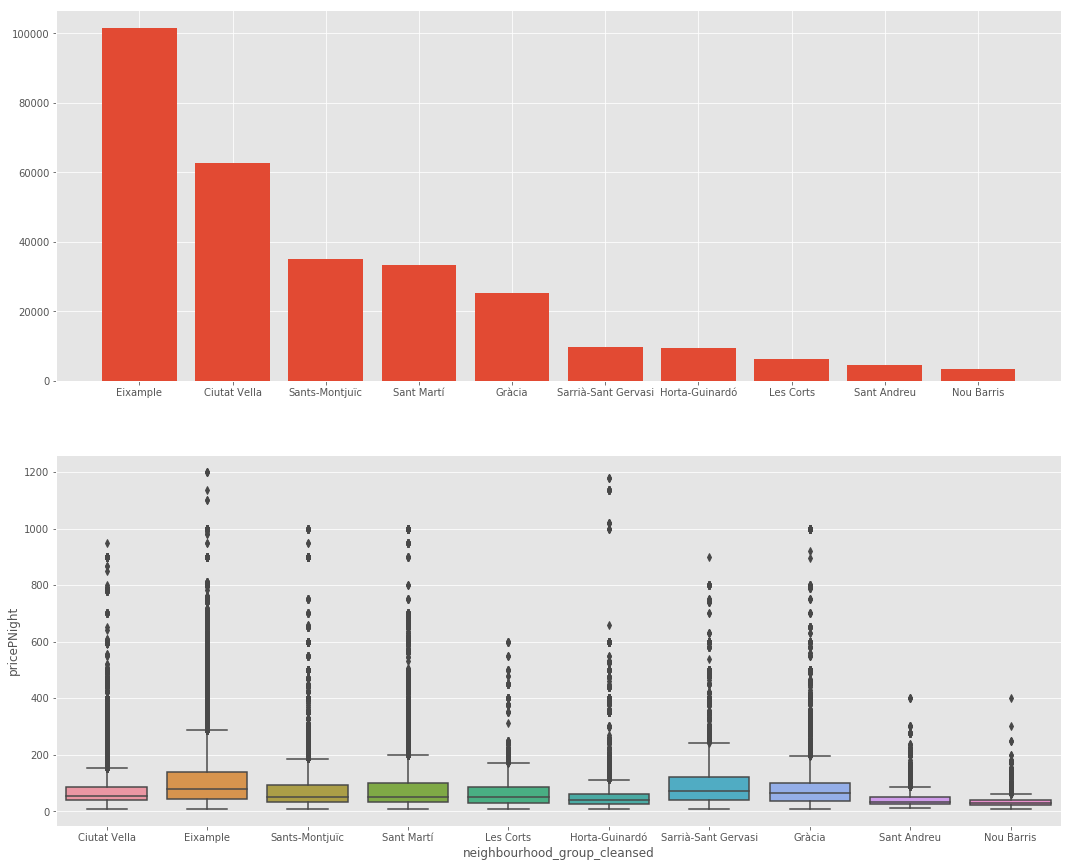

In [68]:
fig, ax = plt.subplots(2, 1, figsize = (18, 15))
ax[0].bar(df['neighbourhood_group_cleansed'].value_counts().index, df['neighbourhood_group_cleansed'].value_counts())
sns.boxplot(df['neighbourhood_group_cleansed'], df['pricePNight'])

In [69]:
df['property_type'].value_counts()

apartment    258888
house         11697
other         11311
hostel         4894
hotel          3732
boat            687
villa           292
Name: property_type, dtype: int64

In [70]:
df.groupby('property_type')['pricePNight'].mean()

property_type
apartment     87.111614
boat         211.074236
hostel        54.768288
hotel         75.187031
house         84.136958
other        160.273126
villa        265.109589
Name: pricePNight, dtype: float64

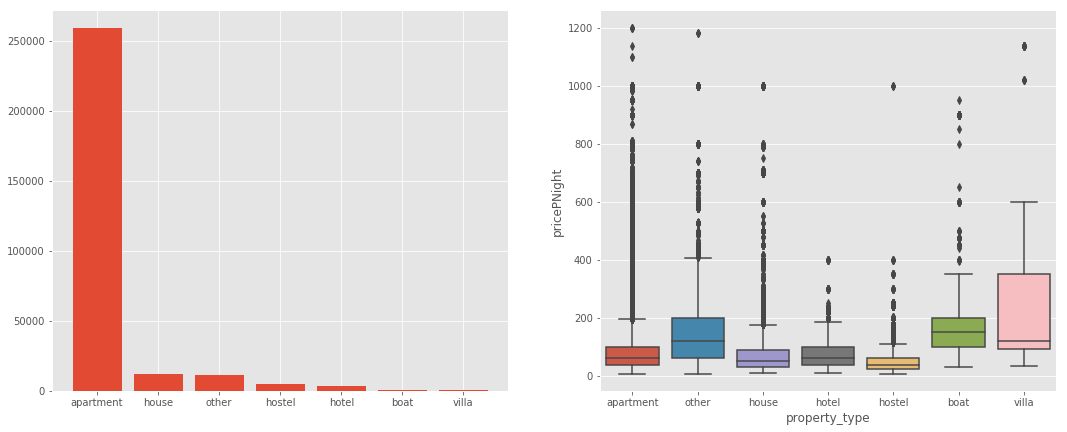

In [71]:
fig, ax = plt.subplots(1, 2, figsize = (18, 7))
ax[0].bar(df['property_type'].value_counts().index, df['property_type'].value_counts())
sns.boxplot(df['property_type'], df['pricePNight'])

In [72]:
df['room_type'].value_counts()

Private room       155321
Entire home/apt    132705
Shared room          2208
Hotel room           1267
Name: room_type, dtype: int64

In [73]:
df.groupby('room_type')['pricePNight'].mean()

room_type
Entire home/apt    141.256903
Hotel room         173.326756
Private room        45.642841
Shared room         29.805707
Name: pricePNight, dtype: float64

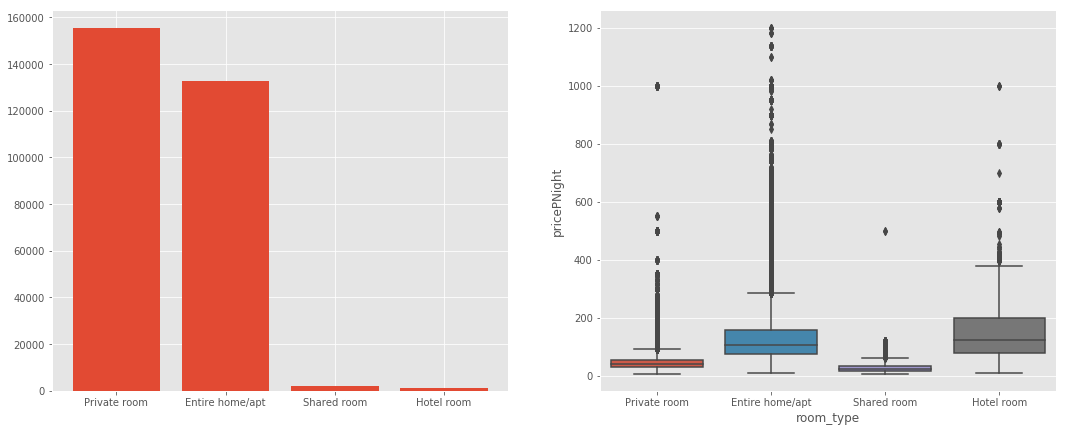

In [74]:
fig, ax = plt.subplots(1, 2, figsize = (18, 7))
ax[0].bar(df['room_type'].value_counts().index, df['room_type'].value_counts())
sns.boxplot(df['room_type'], df['pricePNight'])

**Variables númericas**

In [75]:
noStrCol

Index(['accommodates', 'availability_365', 'bathrooms', 'bedrooms', 'beds',
       'calculated_host_listings_count', 'cleaning_fee', 'extra_people',
       'guests_included', 'host_has_profile_pic', 'host_identity_verified',
       'host_is_superhost', 'host_total_listings_count', 'instant_bookable',
       'is_business_travel_ready', 'is_location_exact', 'latitude',
       'longitude', 'maximum_nights', 'minimum_nights', 'number_of_reviews',
       'price', 'require_guest_phone_verification',
       'require_guest_profile_picture', 'requires_license',
       'review_scores_accuracy', 'review_scores_checkin',
       'review_scores_cleanliness', 'review_scores_communication',
       'review_scores_location', 'review_scores_rating', 'review_scores_value',
       'reviews_per_month', 'security_deposit', 'year', 'month',
       'host_emailverified', 'host_phoneverified', 'host_hasjumio',
       'host_reviewverified', 'host_selfieverified', 'Air conditioning',
       'Family/kid friendly', 

In [76]:
df[noStrCol[:9]].sample(5)

,accommodates,availability_365,bathrooms,bedrooms,beds,calculated_host_listings_count,cleaning_fee,extra_people,guests_included
215398,4,151,1.5,1.0,2.0,7,10.0,10.0,1
68098,12,338,6.5,6.0,13.0,9,70.0,35.0,8
235849,2,88,2.0,1.0,1.0,1,0.0,16.0,1
11018,6,333,1.0,3.0,5.0,35,90.0,24.0,2
248008,1,240,1.0,1.0,1.0,1,20.0,0.0,1


**accommodates**: Número de húespedes

**availability_365**: Número de dias del año en los que está disponible el alojamiento

**bathrooms**

**bedrooms**

**beds**

**cleaning_fee**

**extra_people**

**guest_included??**

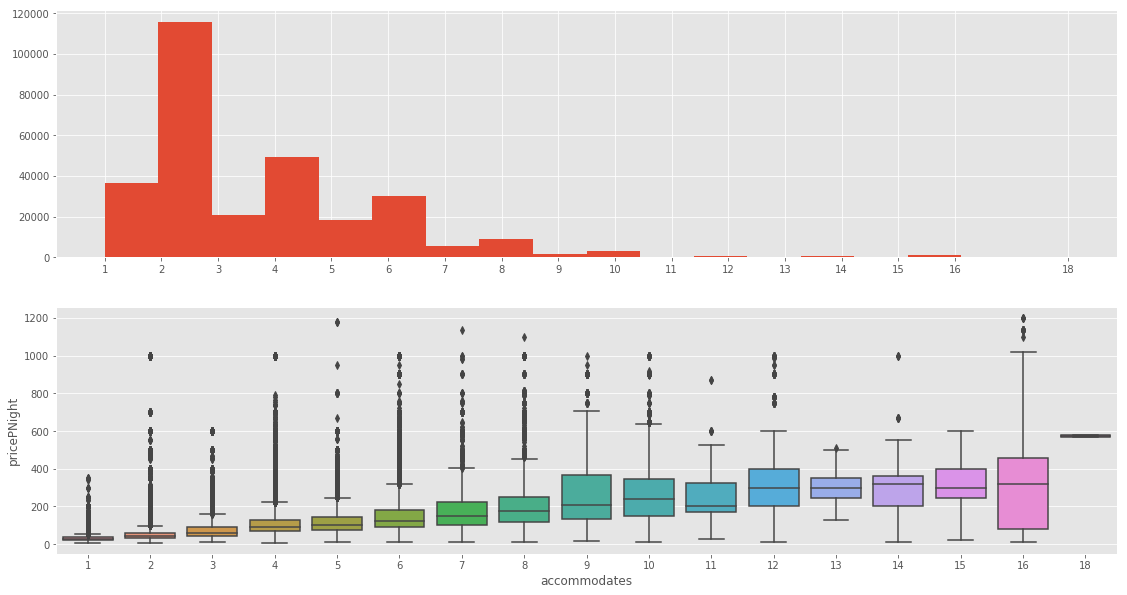

In [77]:
fig, ax = plt.subplots(2, 1, figsize = (19, 10))
ax[0].hist(df['accommodates'], bins = df['accommodates'].max())
ax[0].set_xticks(df['accommodates'].unique())
sns.boxplot(df['accommodates'], df['pricePNight'])

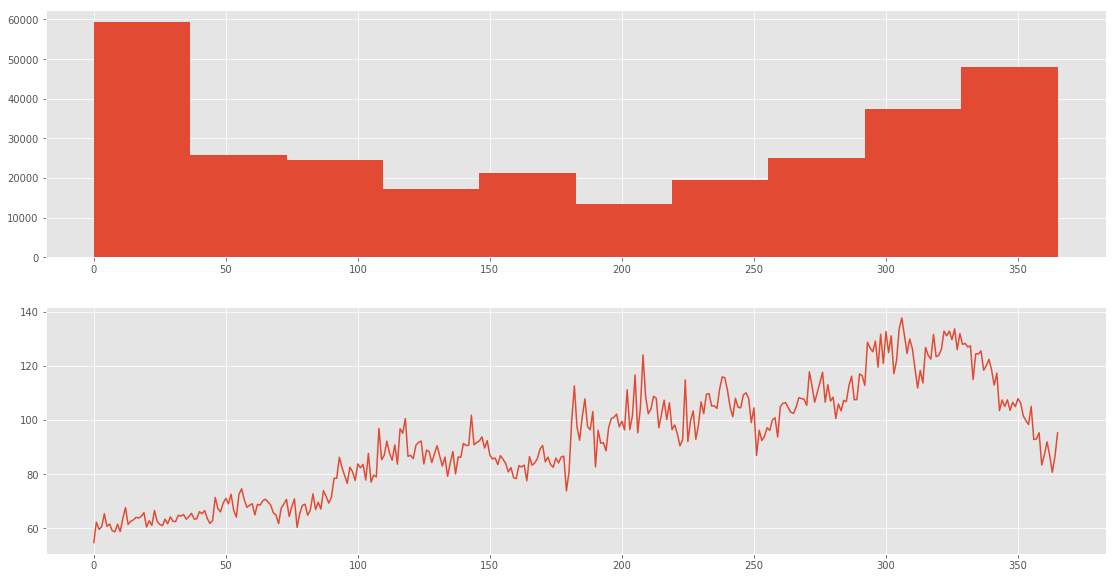

In [78]:
fig, ax = plt.subplots(2, 1, figsize = (19, 10))
ax[0].hist(df['availability_365'])
ax[1].plot(df.groupby('availability_365')['pricePNight'].mean().index,df.groupby('availability_365')['pricePNight'].mean())

In [79]:
df[(df['availability_365']>350)][['name', 'description', 'price', 'pricePNight', 'minimum_nights']]

,name,description,price,pricePNight,minimum_nights
63,65 eur Habitación+salón centro BCN,"En pleno centro de Barcelona,a un minuto de la...",65.0,65.0,1
105,Special Room centre Barcelona.,Special room for 3 people in a modern flat. T...,22.0,22.0,3
128,Mobile World Congress Perfect Apt,This cozy apartment will be very glad to welco...,200.0,200.0,2
131,Nice room city center,room is about 11 Sqm. The House with lift. Ju...,150.0,150.0,2
193,Sunny Modern Flat in City Center!,Beautifully Modern flat/apartment available sm...,395.0,395.0,1
...,...,...,...,...,...
293516,Habitación privada centro de Barcelona,La habitación es suficientemente cómoda para d...,25.0,25.0,2
293536,Double cozy room near Plaza de España,Welcome to Barcelona! Relaxing and cozy room i...,34.0,34.0,1
293539,Habitaciones en sagrada familia,Ofrecemos habitaciones a buen precio en el bar...,100.0,100.0,1
293548,"Barcelona, premium exterior bedroom with Bathroom",Coming to Barcelona? stay in one of the best l...,75.0,75.0,2


Values of: bathrooms
0.0        713
0.5       1162
1.0     205522
1.5      19483
2.0      54740
2.5       2357
3.0       4584
3.5        537
4.0       1298
4.5        138
5.0        291
5.5         61
6.0        144
6.5         10
7.0         14
7.5         41
8.0        386
11.0         1
15.0         2
16.0        16
26.0         1
Name: bathrooms, dtype: int64


/home/guillem/anaconda3/envs/masterds/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


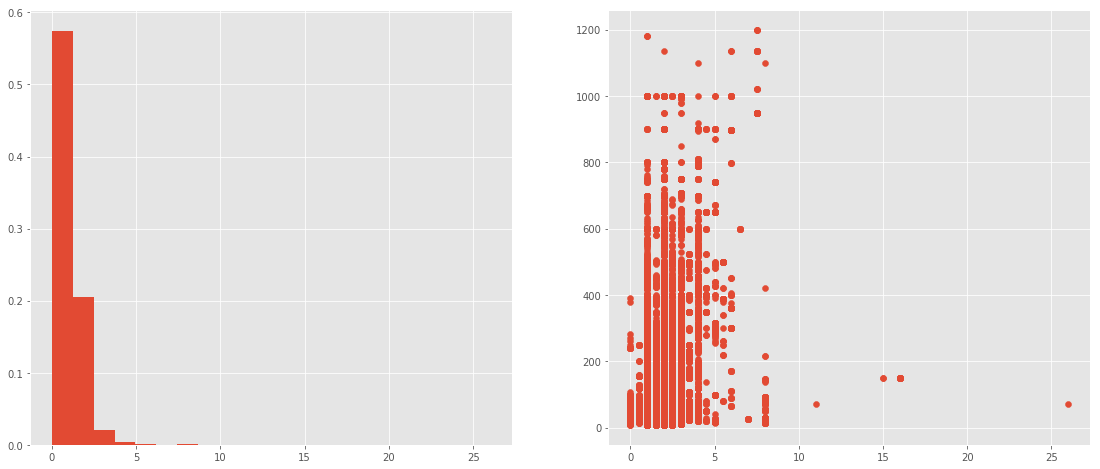


Values of: bedrooms
0.0       7856
1.0     179927
2.0      56503
3.0      33198
4.0      10525
5.0       1948
6.0       1045
7.0        134
8.0         87
9.0        199
10.0        36
11.0         6
12.0        19
15.0         2
16.0        16
Name: bedrooms, dtype: int64


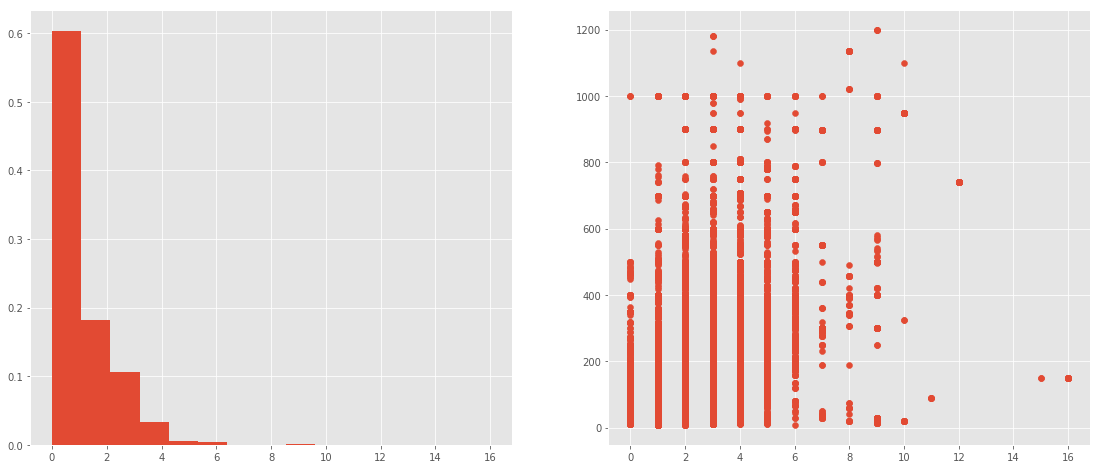


Values of: beds
0.0       1651
1.0     142816
2.0      54844
3.0      35492
4.0      26426
5.0      13148
6.0       8795
7.0       3387
8.0       1813
9.0        932
10.0       741
11.0       157
12.0       395
13.0        56
14.0       245
15.0       137
16.0       292
17.0        25
18.0        39
20.0        23
23.0         4
24.0         4
25.0         4
26.0        19
28.0        15
32.0         9
36.0         7
40.0         7
48.0         6
50.0        12
Name: beds, dtype: int64


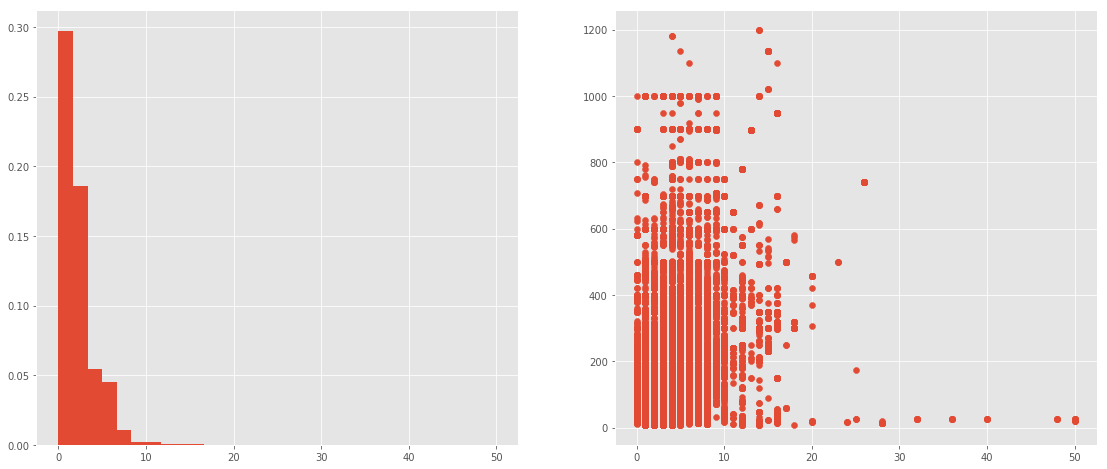

In [80]:
rooms = ['bathrooms' , 'bedrooms' ,'beds']
for room in rooms:
    print('Values of:',room)
    print(df[room].value_counts().sort_index())
    fig, ax = plt.subplots(1, 2, figsize = (19, 8))
    ax[0].hist(df[room], bins = len(df[room].unique()), normed = True)
    ax[1].scatter(df[room], df['pricePNight'])
    plt.show()
    print('')

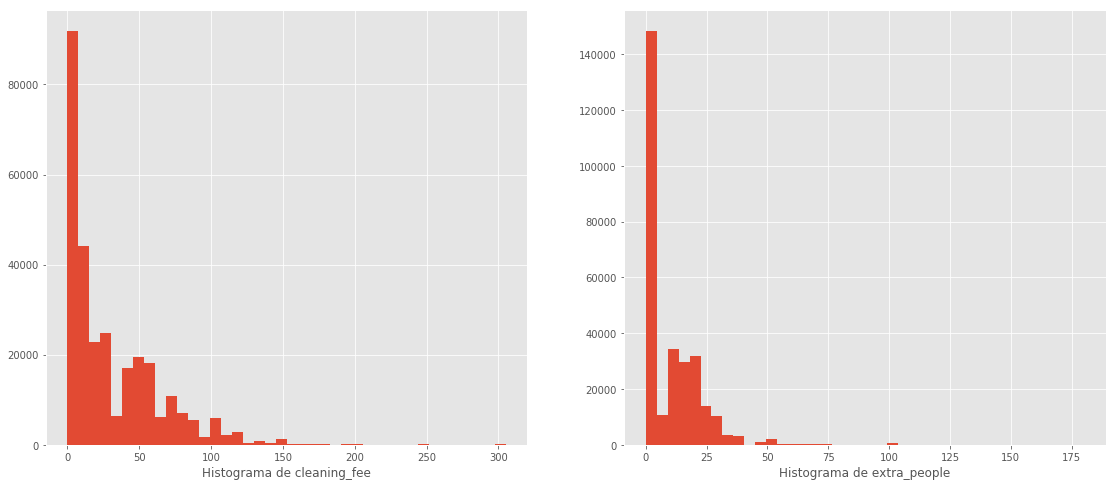

In [100]:
fig, ax = plt.subplots(1, 2, figsize = (19, 8))
ax[0].hist(df['cleaning_fee'], bins = 40)
ax[0].set_xlabel('Histograma de cleaning_fee')
ax[1].hist(df[df['extra_people']<200]['extra_people'], bins = 40)
ax[1].set_xlabel('Histograma de extra_people')
plt.show()

In [81]:
df[noStrCol[9:15]].sample(5)

,host_has_profile_pic,host_identity_verified,host_is_superhost,host_total_listings_count,instant_bookable,is_business_travel_ready
201573,1,0,1,7.0,1,0
244211,1,0,1,2.0,1,0
17219,1,1,0,1.0,0,0
278303,1,0,1,5.0,0,0
15038,1,1,0,1.0,0,0


In [118]:
df[['host_has_profile_pic', 'host_identity_verified', 'host_is_superhost', 'is_business_travel_ready']].mean()

host_has_profile_pic        0.997818
host_identity_verified      0.388283
host_is_superhost           0.199643
is_business_travel_ready    0.001455
dtype: float64

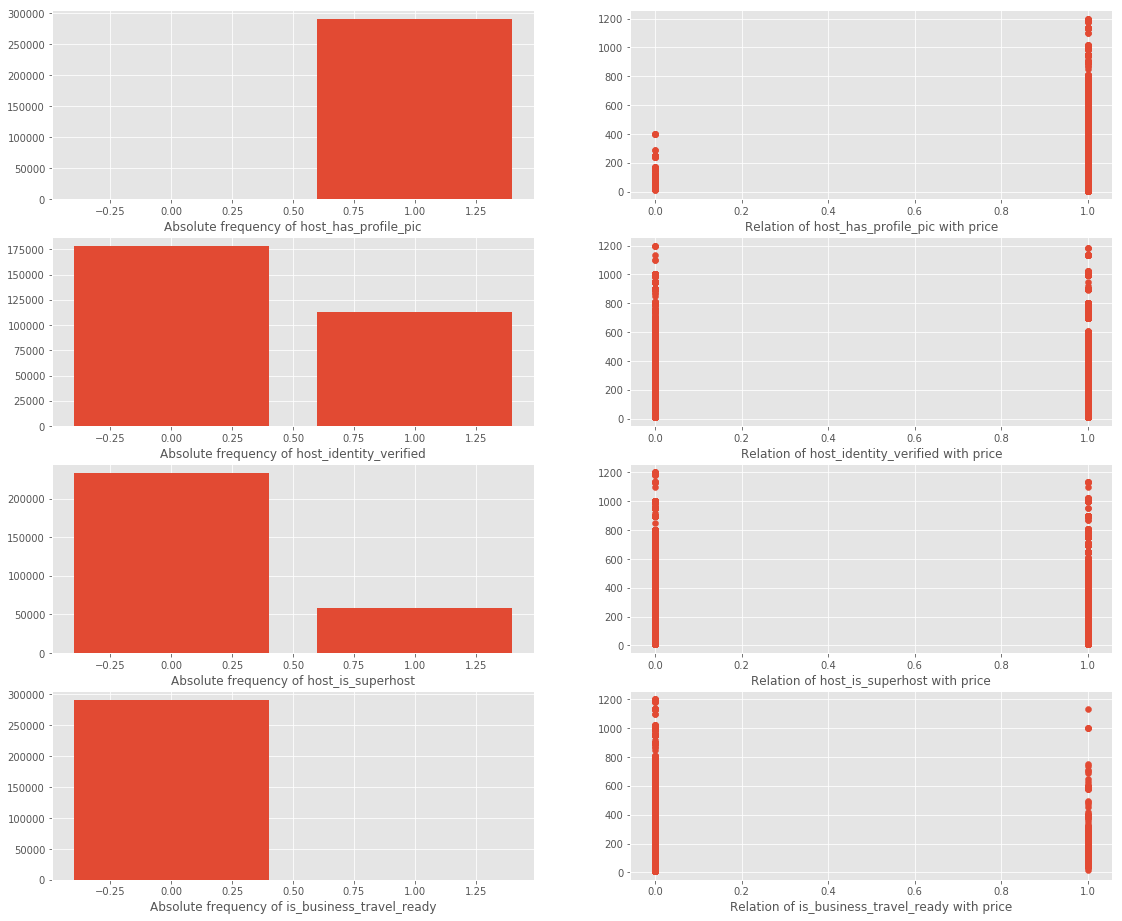

In [132]:
fig, ax = plt.subplots(4, 2, figsize = (19, 16))
for i, column in enumerate(['host_has_profile_pic', 'host_identity_verified', 'host_is_superhost', 'is_business_travel_ready']):
    ax[i,0].bar(df[column].value_counts().index, df[column].value_counts())
    ax[i,1].scatter(df[column], df['pricePNight'])
    ax[i,0].set_xlabel('Absolute frequency of {}'.format(column))
    ax[i,1].set_xlabel('Relation of {} with price'.format(column))

In [82]:
df[noStrCol[15:23]].sample(5)

,is_location_exact,latitude,longitude,maximum_nights,minimum_nights,number_of_reviews,price,require_guest_phone_verification
166865,1,41.424460,2.207630,1125,4,79,119.0,0
128856,1,41.385379,2.174994,1125,32,2,35.0,0
27103,1,41.412703,2.144485,1125,1,9,90.0,1
104073,1,41.396755,2.129026,1125,1,11,55.0,0
37075,1,41.426829,2.092620,1125,2,2,50.0,0


In [155]:
df['maximum_nights'].value_counts().sort_index()

1              187
2              374
3             1228
4             1900
5             3981
              ... 
88888            4
333333           7
1000000          5
5000000          1
2147483647      54
Name: maximum_nights, Length: 293, dtype: int64

In [156]:
df['minimum_nights'].value_counts().sort_index()

1      86197
2      86090
3      66240
4      14782
5       6478
       ...  
350        2
360        7
362        9
364       16
365       38
Name: minimum_nights, Length: 88, dtype: int64

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

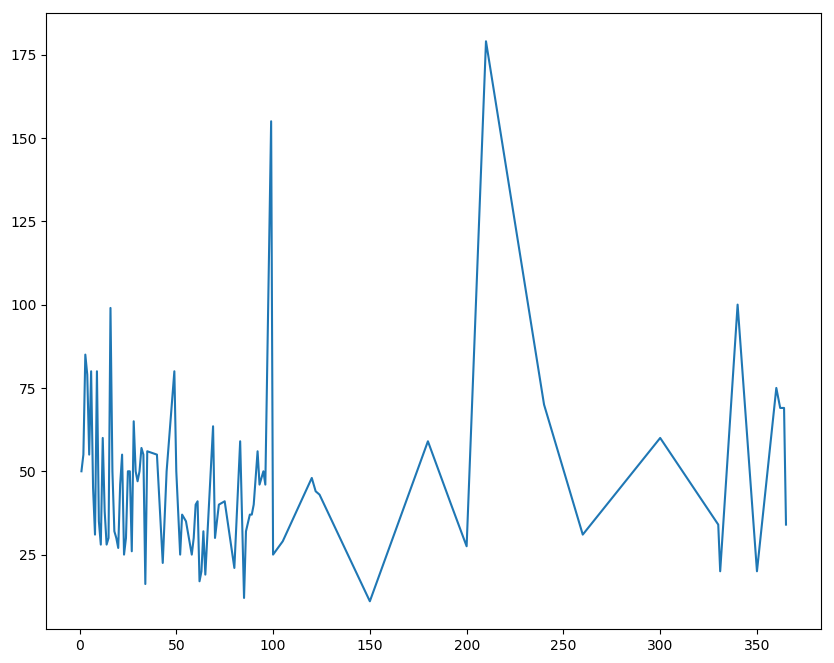

In [160]:
fig, ax = plt.subplots(1, 1, figsize = (10, 8))
ax.plot(df.groupby('minimum_nights')['pricePNight'].median().index, df.groupby('minimum_nights')['pricePNight'].median())
plt.tight_layout

In [121]:
df[['is_location_exact', 'require_guest_phone_verification']].mean()

is_location_exact                   0.682766
require_guest_phone_verification    0.042460
dtype: float64

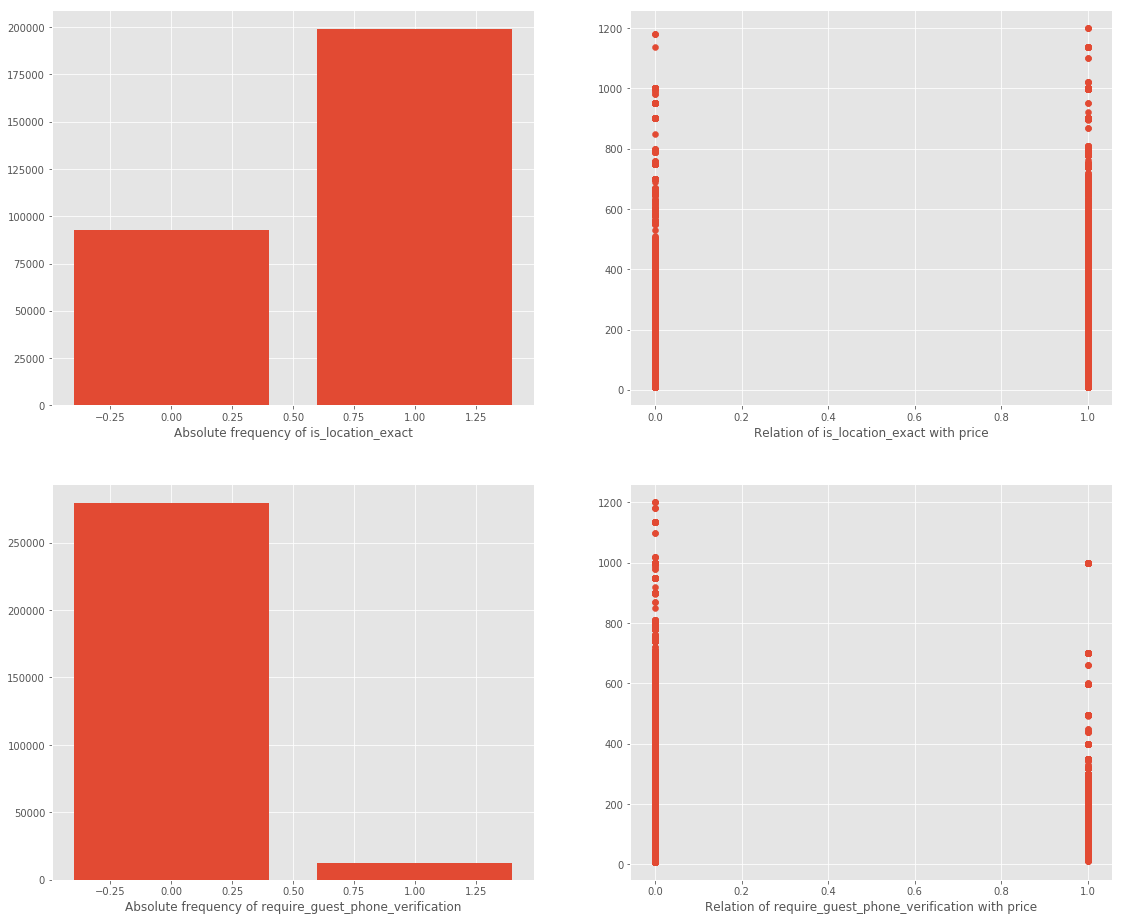

In [127]:
fig, ax = plt.subplots(2, 2, figsize = (19, 16))
for i, column in enumerate(['is_location_exact', 'require_guest_phone_verification']):
    ax[i,0].bar(df[column].value_counts().index, df[column].value_counts())
    ax[i,1].scatter(df[column], df['pricePNight'])
    ax[i,0].set_xlabel('Absolute frequency of {}'.format(column))
    ax[i,1].set_xlabel('Relation of {} with price'.format(column))

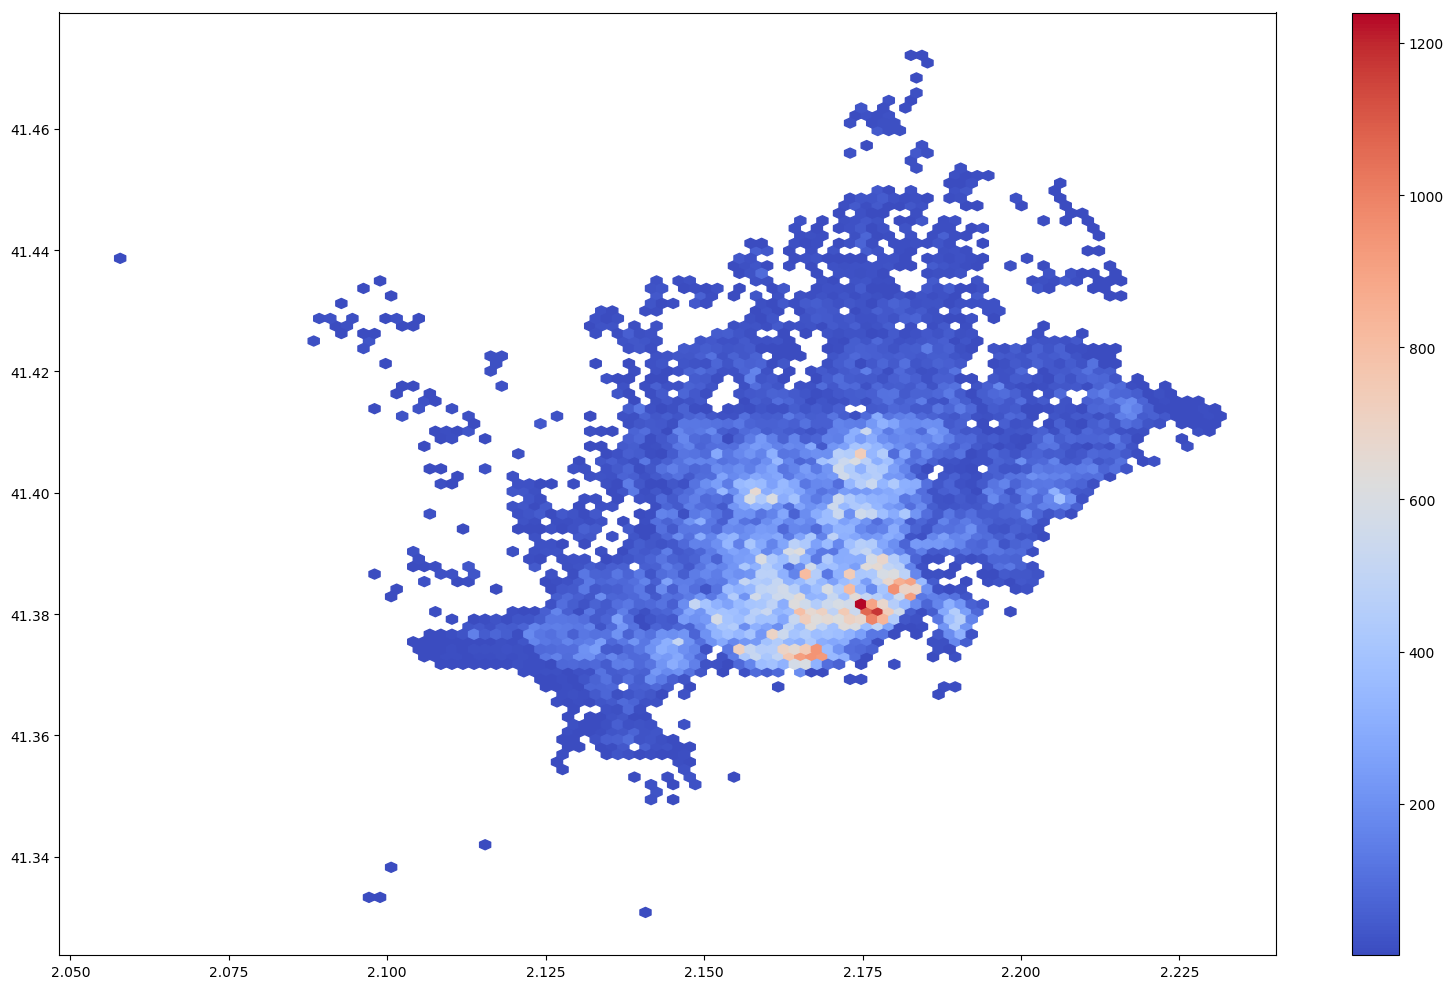

In [152]:
plt.style.use('default')
plt.subplots(1, 1, figsize = (16, 10))
plt.hexbin(df['longitude'], df['latitude'], mincnt = 1, cmap = 'coolwarm')
plt.colorbar()
plt.tight_layout()

In [83]:
df[noStrCol[23:28]].sample(5)

,require_guest_profile_picture,requires_license,review_scores_accuracy,review_scores_checkin,review_scores_cleanliness
247210,0,1,10.0,10.0,9.0
247145,0,1,10.0,10.0,9.0
268101,0,1,9.0,10.0,10.0
73420,0,1,6.0,8.0,8.0
216028,0,1,10.0,10.0,10.0


In [84]:
df[noStrCol[28:35]].sample(5)

,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,reviews_per_month,security_deposit,year
280713,9.0,10.0,9.2,9.0,1.57,350.0,2019
46334,9.0,9.0,7.9,8.0,1.59,300.0,2018
244267,10.0,10.0,9.0,8.0,2.00,0.0,2019
122713,8.0,9.0,8.0,7.0,0.23,250.0,2018
115480,9.0,10.0,10.0,10.0,0.52,0.0,2018


In [62]:
df[noStrCol[35:44]].sample(5)

,month,host_emailverified,host_phoneverified,host_hasjumio,host_reviewverified,host_selfieverified,Air conditioning,Family/kid friendly,Host greets you
121190,12,1,1,1,1,0,1,1,1
123315,12,1,1,1,1,0,1,1,1
201593,06,1,1,1,1,0,1,0,0
52309,07,1,1,0,1,0,1,1,1
216033,07,1,1,1,1,1,0,0,0


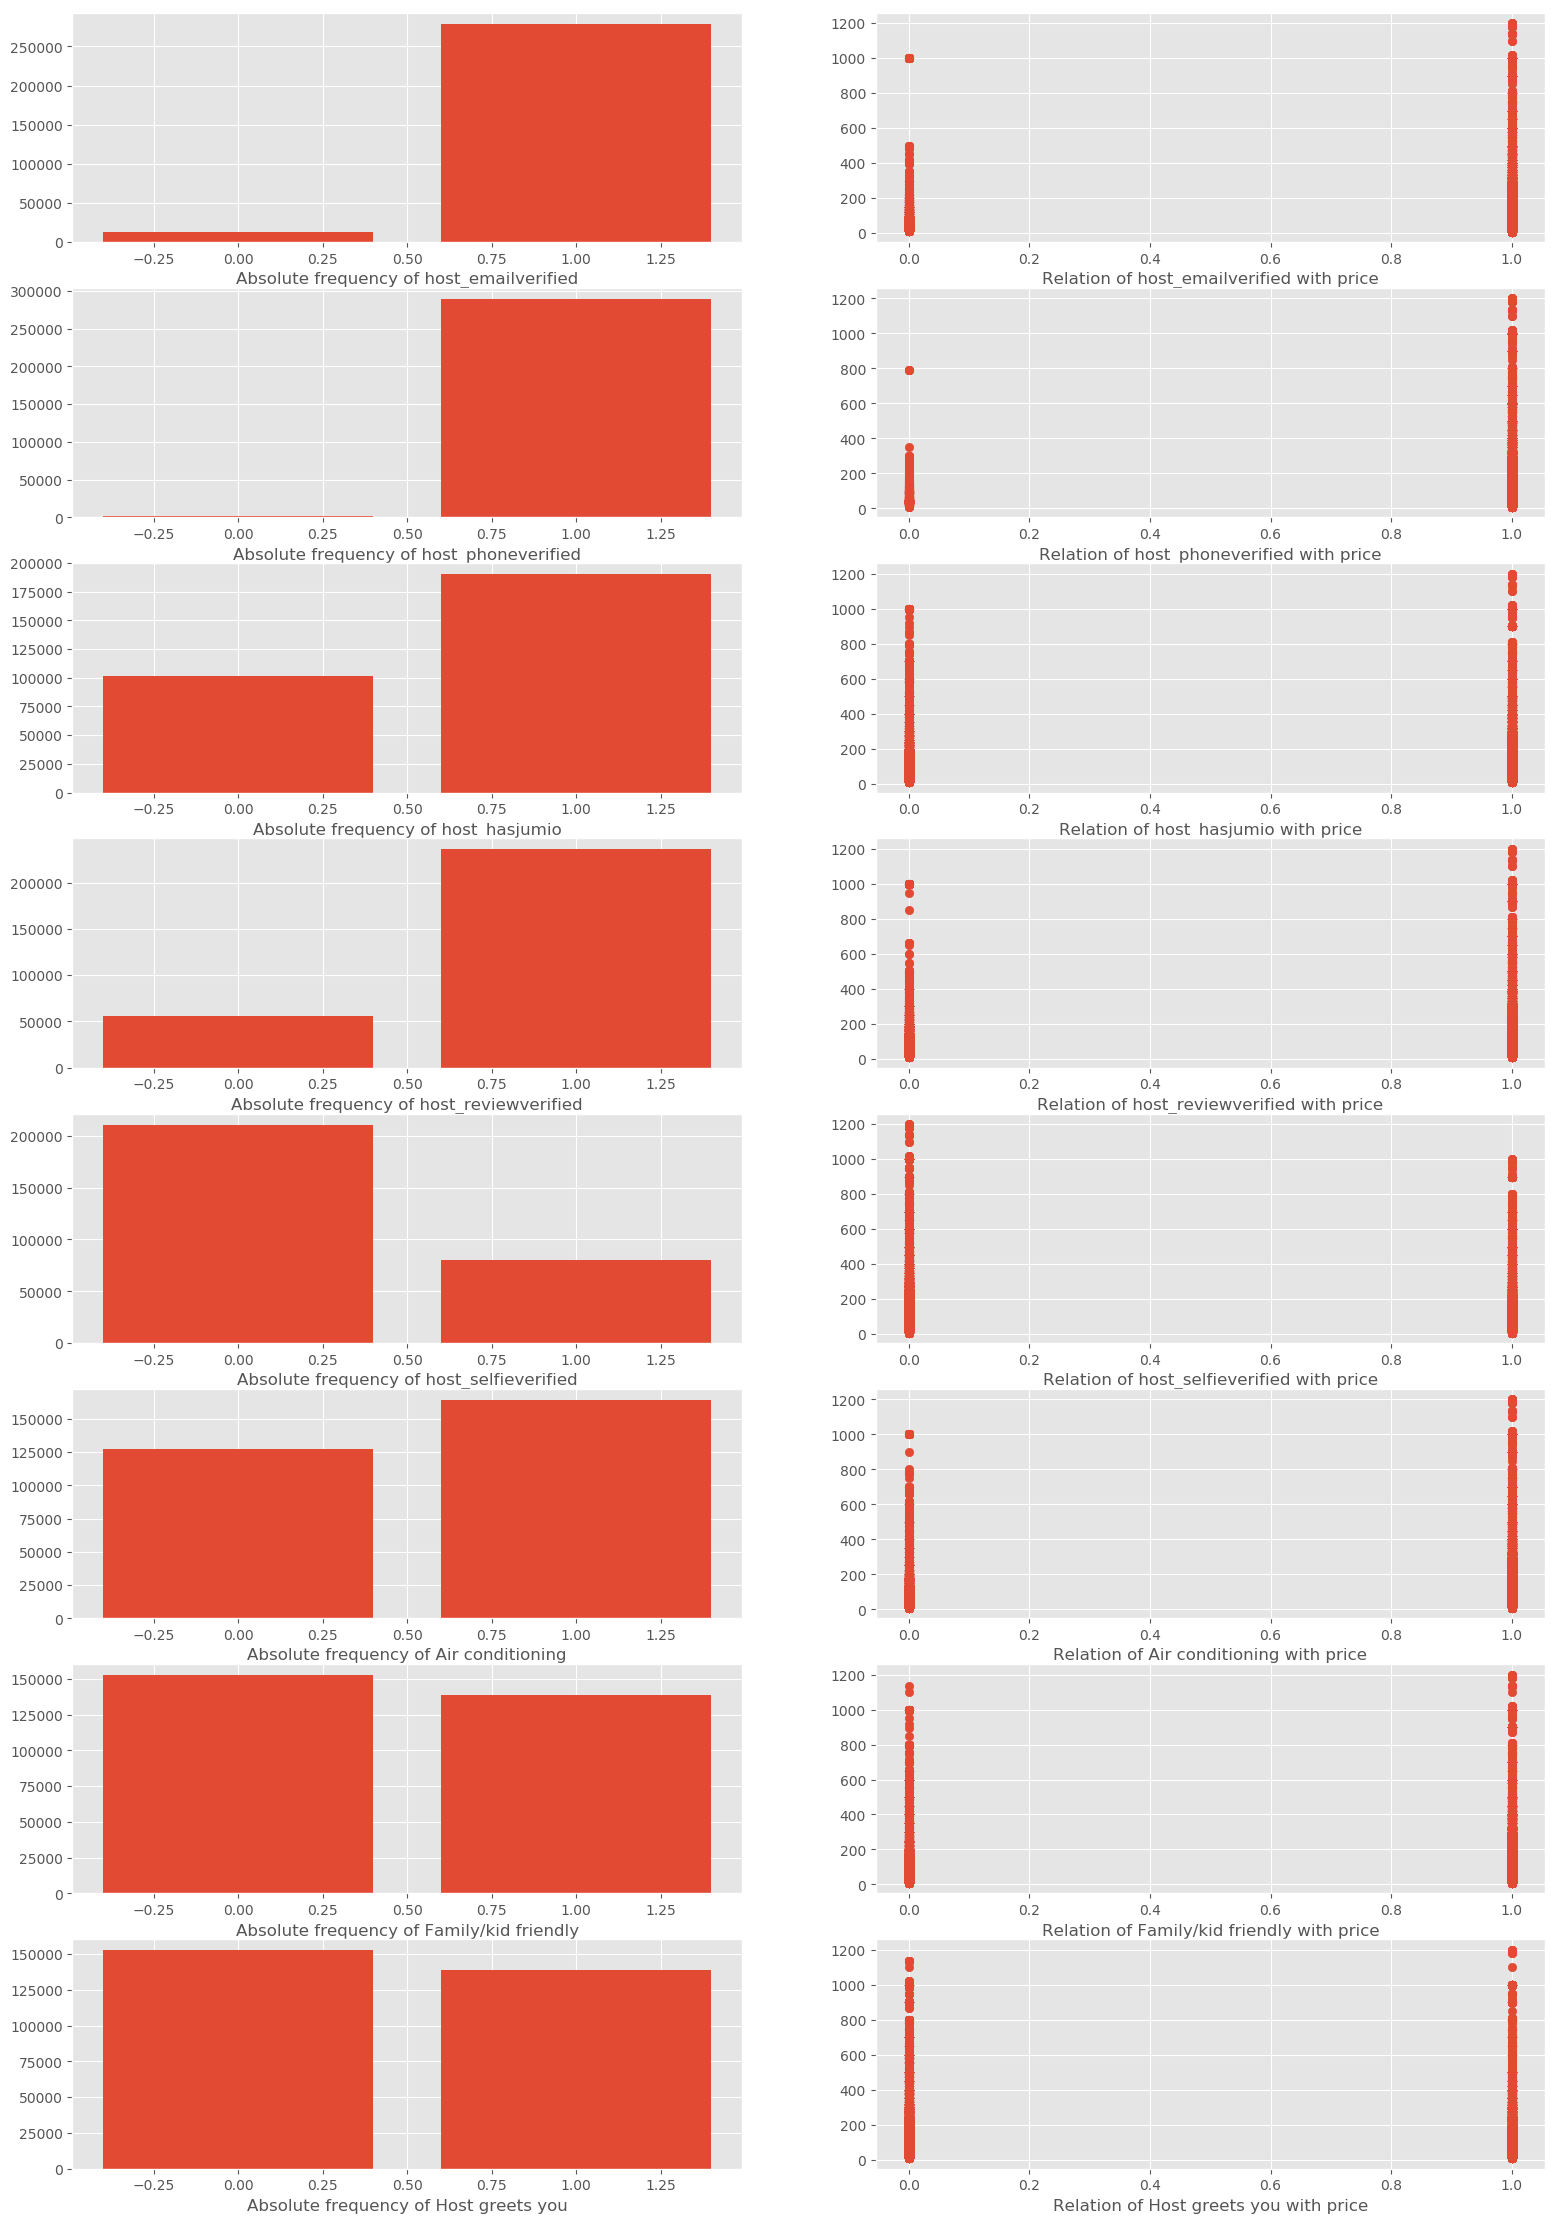

In [164]:
plt.style.use('ggplot')
fig, ax = plt.subplots(8, 2, figsize = (19, 28))
for i, column in enumerate(['host_emailverified', 'host_phoneverified', 'host_hasjumio', 'host_reviewverified', 'host_selfieverified',
                           'Air conditioning', 'Family/kid friendly', 'Host greets you']):
    ax[i,0].bar(df[column].value_counts().index, df[column].value_counts())
    ax[i,1].scatter(df[column], df['pricePNight'])
    ax[i,0].set_xlabel('Absolute frequency of {}'.format(column))
    ax[i,1].set_xlabel('Relation of {} with price'.format(column))

In [63]:
df.groupby(['year', 'month'])['price'].count()

year  month
2018  10       14433
      11       14403
      12       14555
      04       15349
      05       15170
      06       13815
      07       14412
      08       14873
      09       15034
2019  10       15637
      11       15695
      01       13765
      02       13398
      03       13456
      04       13669
      05       13904
      06       14236
      07       14791
      08       15311
      09       15633
Name: price, dtype: int64

In [64]:
df[noStrCol[36:44]].mean()

host_emailverified     0.957824
host_phoneverified     0.993435
host_hasjumio          0.652489
host_reviewverified    0.809082
host_selfieverified    0.276217
Air conditioning       0.563482
Family/kid friendly    0.476427
Host greets you        0.476475
dtype: float64

In [65]:
df[noStrCol[44:]].sample(5)

,Laptop friendly workspace,Paid parking off premises,Patio or balcony,Luggage dropoff allowed,Long term stays allowed,Smoking allowed,Step-free access,Paid parking on premises
263602,1,1,0,1,1,0,0,0
290865,1,0,0,0,1,0,0,0
44850,1,1,0,0,1,0,0,0
44857,0,0,0,0,0,0,0,0
143782,1,1,0,0,0,0,0,0


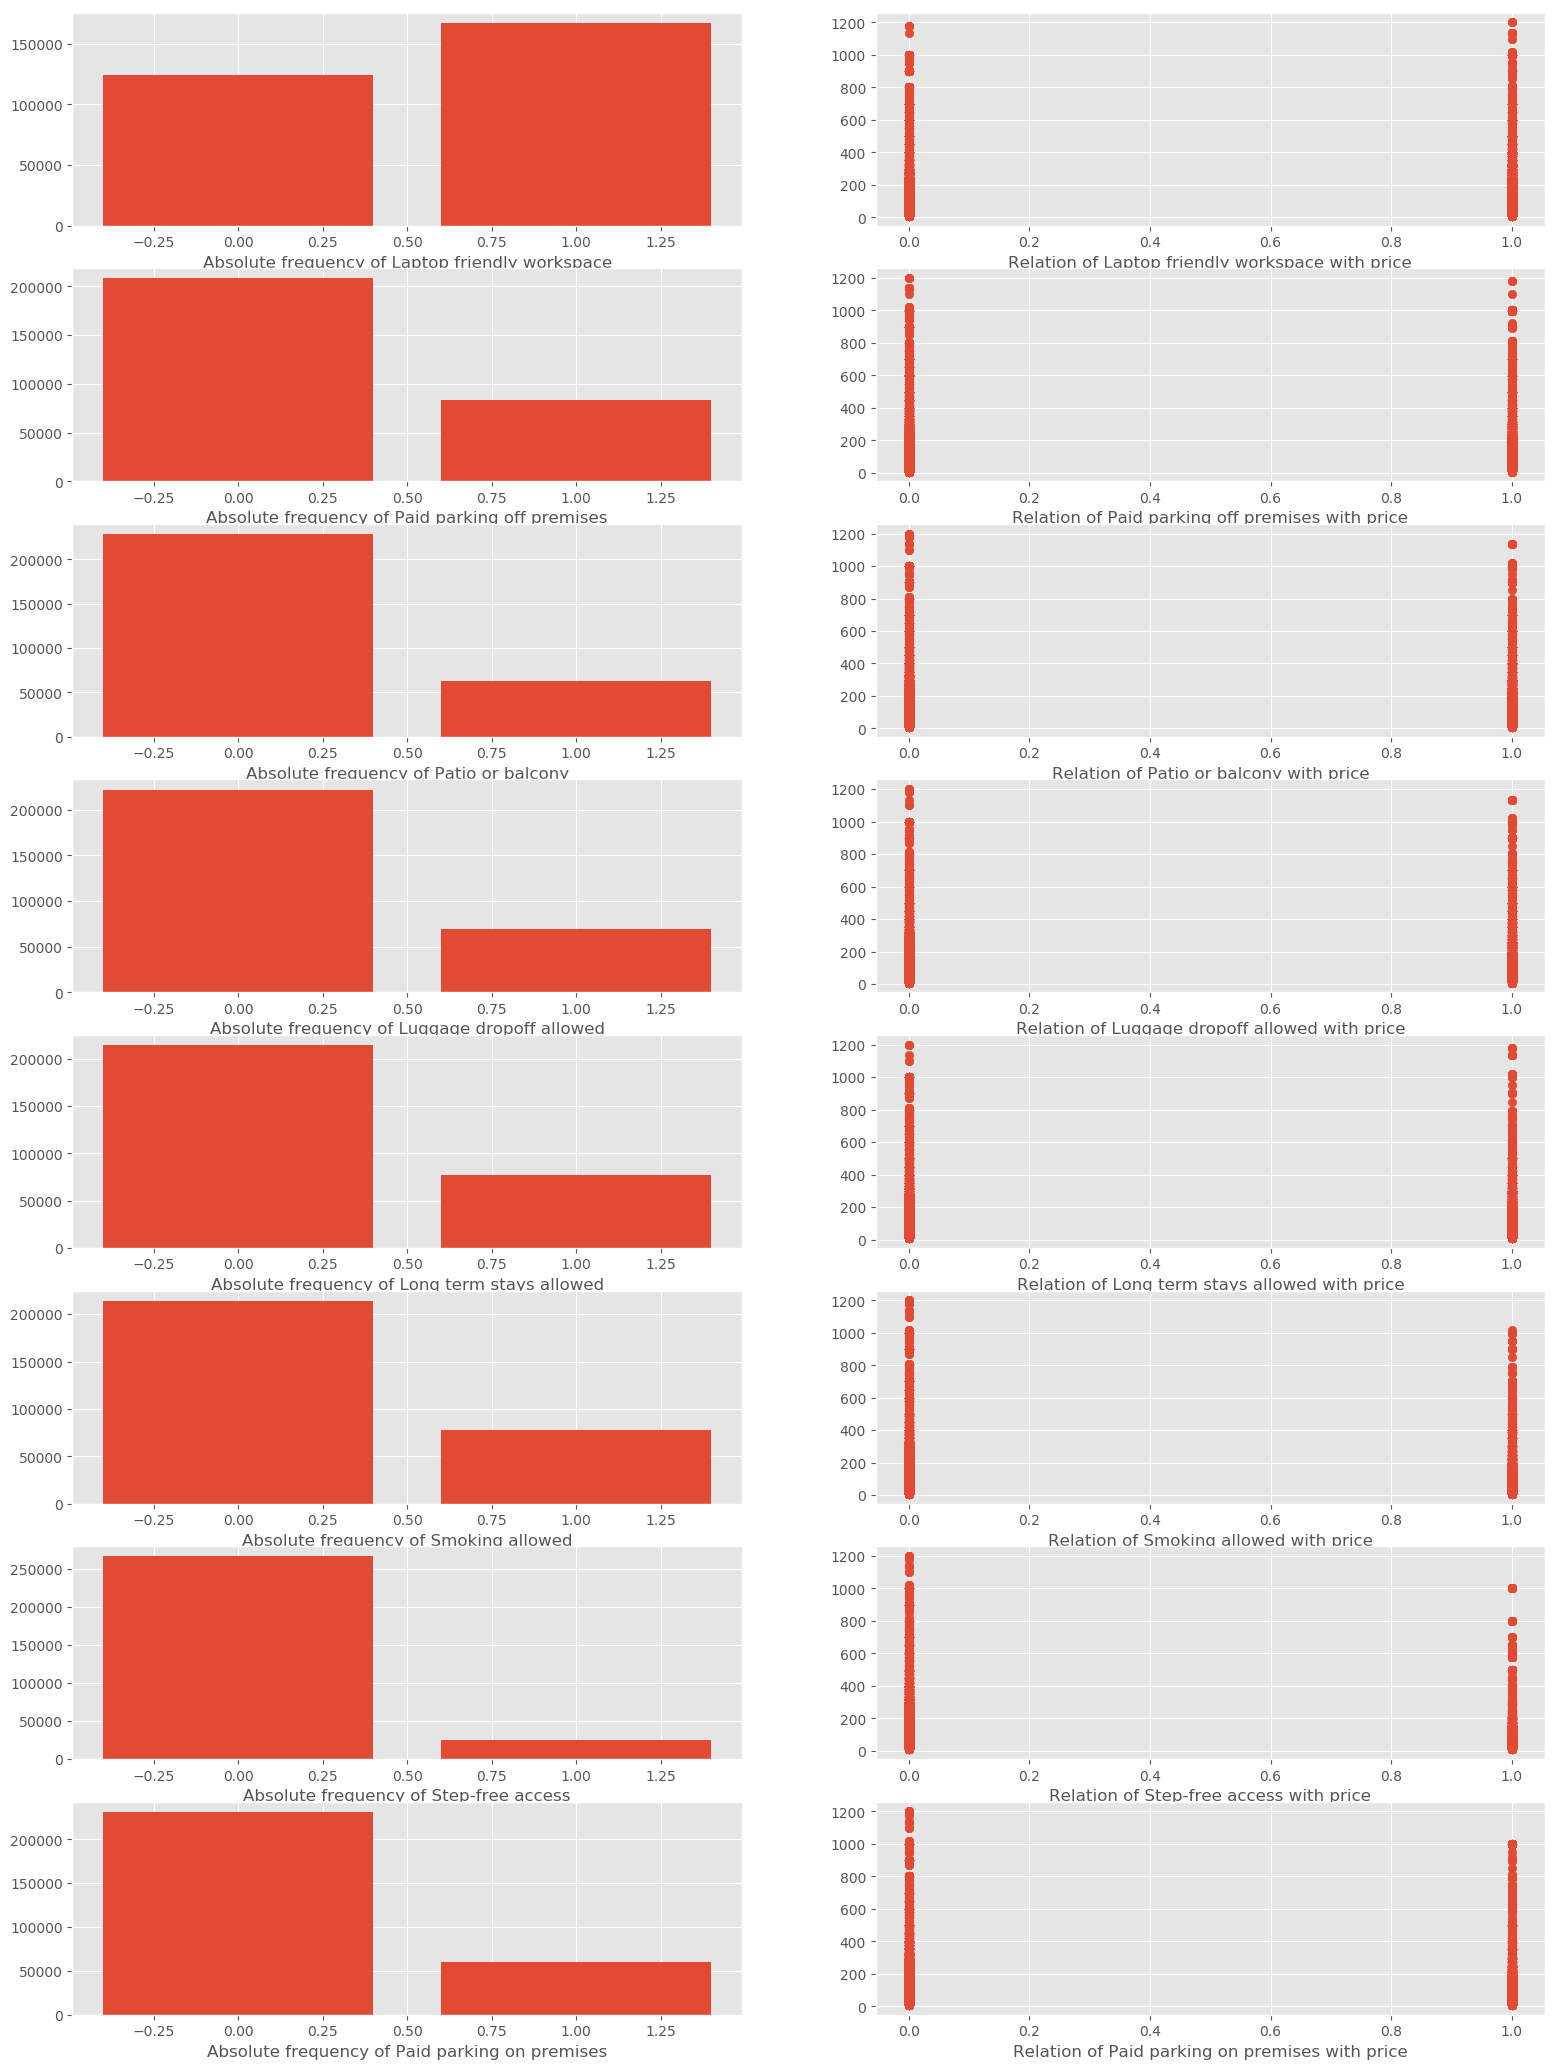

In [165]:
plt.style.use('ggplot')
fig, ax = plt.subplots(8, 2, figsize = (19, 26))
for i, column in enumerate(['Laptop friendly workspace', 'Paid parking off premises', 'Patio or balcony', 'Luggage dropoff allowed',
                           'Long term stays allowed', 'Smoking allowed', 'Step-free access', 'Paid parking on premises']):
    ax[i,0].bar(df[column].value_counts().index, df[column].value_counts())
    ax[i,1].scatter(df[column], df['pricePNight'])
    ax[i,0].set_xlabel('Absolute frequency of {}'.format(column))
    ax[i,1].set_xlabel('Relation of {} with price'.format(column))

In [66]:
df[noStrCol[44:]].mean()

Laptop friendly workspace    0.573364
Paid parking off premises    0.285797
Patio or balcony             0.216294
Luggage dropoff allowed      0.238335
Long term stays allowed      0.264184
Smoking allowed              0.265272
Step-free access             0.087237
Paid parking on premises     0.206988
dtype: float64

### Plots 

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
df['date']

0        2018-04-01
1        2018-04-01
2        2018-04-01
3        2018-04-01
4        2018-04-01
            ...    
293555   2019-11-01
293556   2019-11-01
293557   2019-11-01
293558   2019-11-01
293559   2019-11-01
Name: date, Length: 291539, dtype: datetime64[ns]

In [69]:
df[df['price']>=1000][['name', 'description', 'price', 'date', 'minimum_nights']]

,name,description,price,date,minimum_nights
2882,Central luxury apartment with chillout terrace...,Luxury and Elegance at it's best. Luxurious an...,1000.0,2018-04-01,3
3196,Central Luxury Penthouse 6 guests (3 Bedrooms) AG,"Free WiFi, 3 bedrooms each with 2 single beds,...",1000.0,2018-04-01,3
3263,COBI Apartment Very central 4 bed / 2 bath ...,bussines traveler,1000.0,2018-04-01,3
3510,Central luxury apartment with chillout terrace B8,Luxury and Elegance at it's best. Luxurious an...,1000.0,2018-04-01,3
8276,Modern style apartment España Sq!,Nro de inscripción (phone number hidden) Hello...,1500.0,2018-04-01,100
...,...,...,...,...,...
286194,YH9/2-Suissa|Bright & comfy apartment in Barce...,"Suministros básicos (agua, luz, gas, Internet)...",5000.0,2019-11-01,32
286311,YH8/5-Marina | Luxury central apartment,Apartamento de alquiler temporal: mínimo 32 no...,5000.0,2019-11-01,33
287366,YH5/4-Berna 14 1/2 | The Perfect Apartment For...,The new Berna design apartment of YOURHOMING i...,5000.0,2019-11-01,32
287791,Apartment 2 rooms for long stays,This bright modern apartment for 4 people is l...,1000.0,2019-11-01,30


/home/guillem/anaconda3/envs/masterds/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


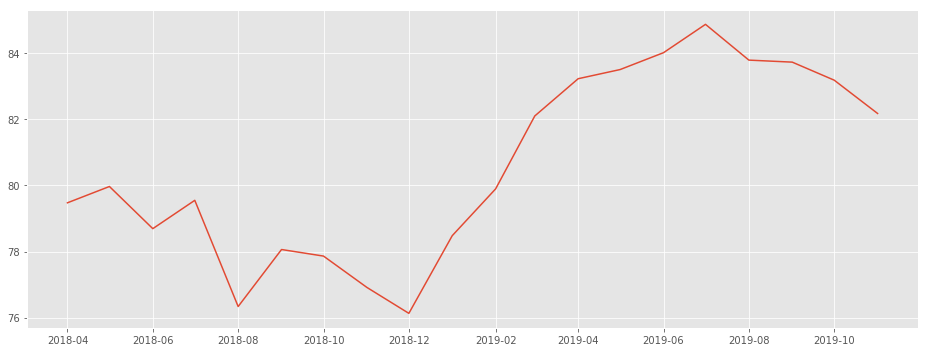

In [70]:
plt.style.use('ggplot')
fig, ax = plt.subplots(1, 1, figsize = (13, 5))
ax.plot(df.groupby('date')['pricePNight'].mean().index, df.groupby('date')['pricePNight'].mean())
plt.tight_layout()

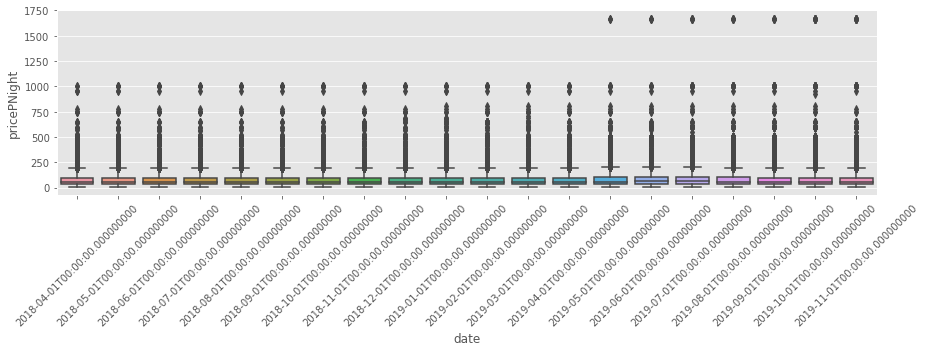

In [71]:
fig, ax = plt.subplots(1, 1, figsize = (13, 5))
sns.boxplot(df['date'], df['pricePNight'])
ax.set_xticklabels(df['date'].unique(), rotation = 45)
plt.tight_layout()

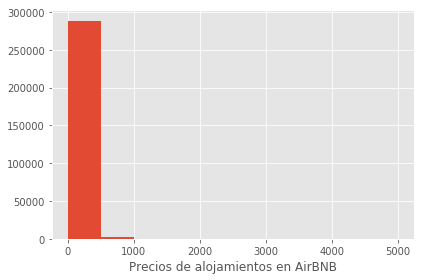

In [72]:
fig, ax = plt.subplots(1, 1)
ax.hist(df['price'])
plt.xlabel('Precios de alojamientos en AirBNB')
plt.tight_layout()

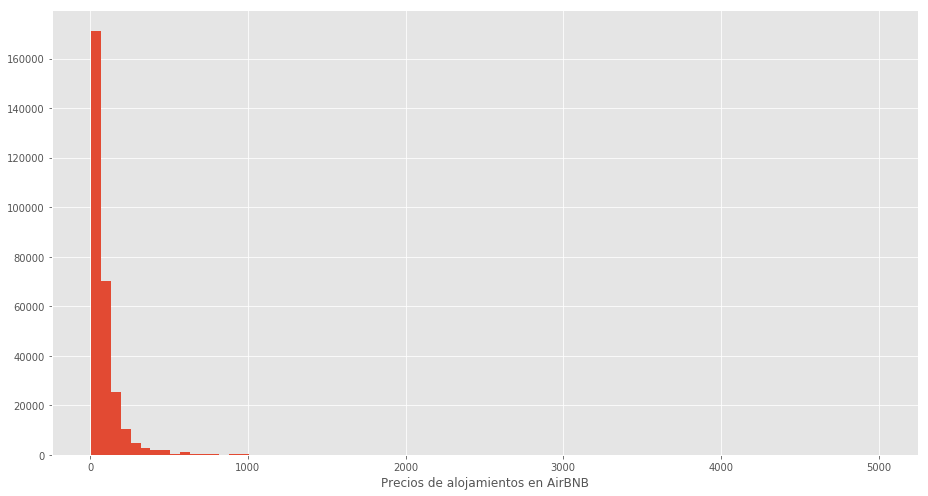

In [73]:
fig, ax = plt.subplots(1, 1, figsize = (13, 7))
ax.hist(df['price'], bins = 80)
plt.xlabel('Precios de alojamientos en AirBNB')
plt.tight_layout()

In [74]:
df['pricePNight'].describe()

count    291539.000000
mean         80.619931
std          74.619862
min           8.000000
25%          35.000000
50%          60.000000
75%         100.000000
max        1666.666667
Name: pricePNight, dtype: float64

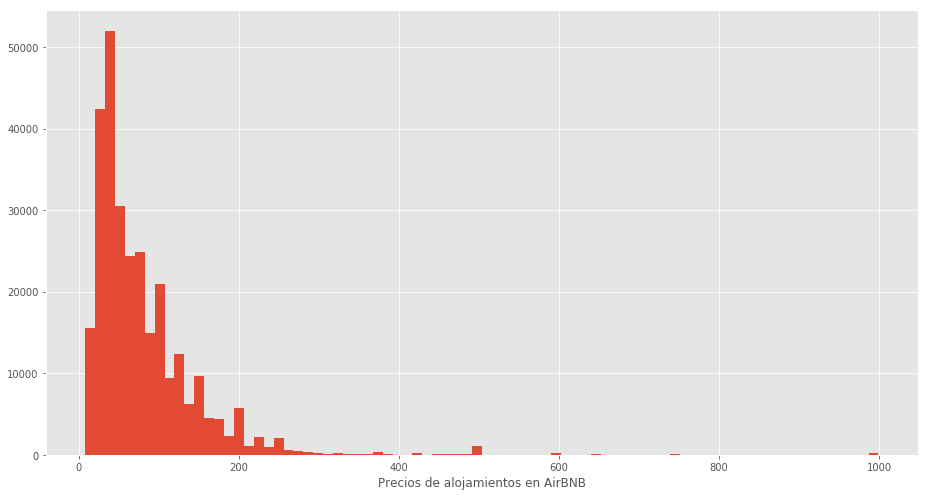

In [75]:
fig, ax = plt.subplots(1, 1, figsize = (13, 7))
ax.hist(df[df['pricePNight']< 1000]['pricePNight'], bins = 80)
plt.xlabel('Precios de alojamientos en AirBNB')
plt.tight_layout()

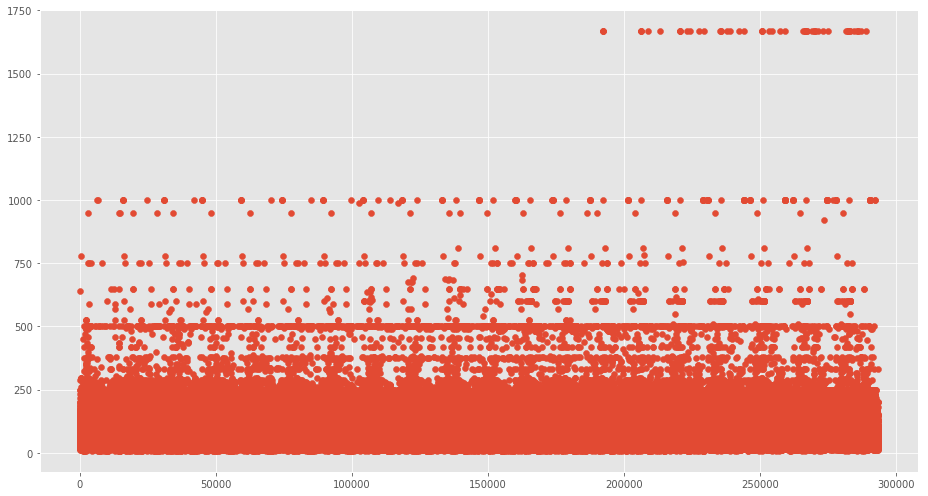

In [76]:
fig, ax = plt.subplots(1, 1, figsize = (13, 7))
ax.scatter(df.index, df['pricePNight'])
plt.tight_layout()